In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numDiffEqPyLib as ode

I want to recreate the wave equation. Why do I focus on the wave equation so much? Couldnt tell you, but I love it and think its beautiful, so I want to recreate it. From what i've found I gotta do central difference formulas in space and time. For 1D, we have the wave equation as

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

And anything higher can be generalized as

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u.
$$

But for simplicity, lets just chill with the 1D case for the time being. From numerical analysis we can recall the definition of central finite differences equation is 

$$
\frac{d^2 f}{dx^2} \approx \frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{(\Delta x)^2}
$$

And abstracting to partial differential equations we get

$$
\frac{\partial^2 u}{\partial t^2}(x_0, t_0) = \approx \frac{u(x_0+\Delta x, t_0)-2u(x_0,t_0)+u(x_0-\Delta x,t_0)}{(\Delta x)^2}.
$$

Quick note, that $\Delta x$ in the denominator is only there because we are thinking of the partial derivative with respect to space. If we were talking about the partial derivative with respect to time it would be $\Delta t$, as we will see in the later equations. It then becomes a natural extension for the time dimension. Substituting in the central difference formulas into the original wave equation (Still staying 1D for simplicity)

$$
\frac{u_j^{(m+1)}-2u_j^{(m)}+u_j^{(m-1)}}{(\Delta t)^2} \approx c^2 \frac{u_j^{(m+1)}-2u_j^{(m)}+u_j^{(m-1)}}{(\Delta x)^2}.
$$

Thats what ive gotten so far. Now my questions are, what the heck are $m$ and $j$? Upon further looking, find that 

$$
u_j^{(m)} = \tilde{u}(x_0, t_0)
$$

which is the approximated value of $u$. However, we have run into a problem. Wave equation seems to be a tad bit complicated for what tools we have at our disposal right now. So we are going to switch to the heat equation instead, which  is a little simpler. But if we can simulate the heat equation then simulating the wave equation SHOULD be a natural extension. So lets see what happens. Rearranging everything into something that makes sense from a computing standpoint we get

$$
u_i^{new}=u_i^{old}+s(u_{i+1}^{old}+2u_i^{old}+u_{i-1}^{old})
$$

with $s$ being $s=k\frac{\Delta t}{(\Delta x)^2}$. This is just the coefficient gained from rearranging. Remember this is for the HEAT EQUATION, NOT the wave equation.

In the next cell lets lay out some pseudocode for how we should approach this.

In [2]:
# for t in time
#     for x over space
#         check for edge cases
#         compute using u_i^{new}=u_i^{old}+s(u_{i+1}^{old}+2u_i^{old}+u_{i-1}^{old})
#         store in an array where each index is another x graph

# for frame in array
#     plot frame
#     save frame
    
# after loops, create movie using ffmpeg

In [3]:
#x[-1:0] gives the last element of the array
print(x[-1:])

NameError: name 'x' is not defined

In [4]:
def initialFunction(x):
    return(np.sin(np.pi*x))

In [31]:
#Length of rod
length = 1
timeInterval = 0.1
k=1

x = np.linspace(0,1,10)
t = np.linspace(0,0.1,50)

#number of time steps
numSpace = 10
numTime = 50

#Definition of changes
deltax = length/numSpace
deltat = timeInterval/numTime

s = (k*deltat)/(deltax**2)

heatData = np.zeros((len(t),len(x)))

#Initialize the first entry
heatData[0]=initialFunction(x)

lastu = heatData[0]
nextu = np.zeros(len(heatData[0]))

for j in range(len(t)):
    for i in range(len(x)):
        if j == 0:
            continue
        else:
            if i == 0:
                nextu[i] = 0
            if i == len(x)-1:
                nextu[i] = 0
            else:
                nextu[i] = lastu[i]+s*(lastu[i+1]-2*lastu[i]+lastu[i-1])
        heatData[i] = nextu
        lastu = nextu

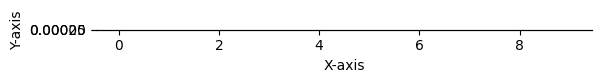

In [36]:
fig, ax = plt.subplots()
ax.plot(heatData[0])

# Set a fixed aspect ratio (e.g., 1)
ax.set_aspect('equal', adjustable='box')

# Set plot title and labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()